In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# setting up the working directory
os.chdir("/content/drive/MyDrive/Imarticus/Captsoneproject_ml")
os.getcwd()
# importing the dataset
data = pd.read_csv("insuranceFraud.csv")

Features:

1.	months_as_customer: It denotes the number of months for which the customer is associated with the insurance company.
2.	age: continuous. It denotes the age of the person.
3.	policy_number: The policy number.
4.	policy_bind_date: Start date of the policy.
5.	policy_state: The state where the policy is registered.
6.	policy_csl-combined single limits. How much of the bodily injury will be covered from the total damage.
https://www.berkshireinsuranceservices.com/arecombinedsinglelimitsbetter  
7.	policy_deductable: The amount paid out of pocket by the policy-holder before an insurance provider will pay any expenses.
8.	policy_annual_premium: The yearly premium for the policy.
9.	umbrella_limit: An umbrella insurance policy is extra liability insurance coverage that goes beyond the limits of the insured's homeowners, auto or watercraft insurance. It provides an additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident.
10.	insured_zip: The zip code where the policy is registered.
11.	insured_sex: It denotes the person's gender.
12.	insured_education_level: The highest educational qualification of the policy-holder.
13.	insured_occupation: The occupation of the policy-holder.
14.	insured_hobbies: The hobbies of the policy-holder.
15.	insured_relationship: Dependents on the policy-holder.
16.	capital-gain: It denotes the monitory gains by the person.
17.	capital-loss: It denotes the monitory loss by the person.
18.	incident_date: The date when the incident happened.
19.	incident_type: The type of the incident.
20.	collision_type: The type of collision that took place.
21.	incident_severity: The severity of the incident.
22.	authorities_contacted: Which authority was contacted.
23.	incident_state: The state in which the incident took place.
24.	incident_city: The city in which the incident took place. 
25.	incident_location: The street in which the incident took place.
26.	incident_hour_of_the_day: The time of the day when the incident took place.
27.	property_damage: If any property damage was done.
28.	bodily_injuries: Number of bodily injuries.
29.	Witnesses: Number of witnesses present.
30.	police_report_available: Is the police report available.
31.	total_claim_amount: Total amount claimed by the customer.
32.	injury_claim: Amount claimed for injury
33.	property_claim: Amount claimed for property damage.
34.	vehicle_claim: Amount claimed for vehicle damage.
35.	auto_make: The manufacturer of the vehicle
36.	auto_model: The model of the vehicle. 
37.	auto_year: The year of manufacture of the vehicle. 


Target Label:
Whether the claim is fraudulent or not.
38.	fraud_reported:  Y or N


Model 1 : https://colab.research.google.com/drive/1i_qU7c_JAqFoE-GPqOu1P_mtx22_7nwQ#scrollTo=TygA6mzy9m7g&line=23&uniqifier=1

Model 2 :
Model 3 :

In [7]:
data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [44]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,0.246760,0.248000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.243890,3.883000,0.247490,0.247350,0.246390,25126.100000,-26793.700000,0.246860,0.248220,2.74600,0.248100,0.246010,0.245420,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,0.247130,2005.103000,0.247000
std,115.113174,9.140287,0.012652,0.018339,611.864673,244.167395,2.297407e+06,71701.610941,0.014966,2.011805,0.057659,0.174296,0.030486,27872.187708,28104.096686,0.071443,0.020343,0.96458,0.069208,0.053666,0.023276,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.051466,6.015861,0.431483
min,0.000000,19.000000,0.230000,0.220000,500.000000,433.330000,-1.000000e+06,430104.000000,0.230000,1.000000,0.170000,0.090000,0.210000,0.000000,-111100.000000,0.090000,0.230000,1.00000,0.070000,0.180000,0.220000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.160000,1995.000000,0.000000
25%,115.750000,32.000000,0.230000,0.220000,500.000000,1089.607500,0.000000e+00,448404.500000,0.230000,2.000000,0.200000,0.160000,0.210000,0.000000,-51500.000000,0.270000,0.230000,2.00000,0.210000,0.220000,0.220000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.190000,2000.000000,0.000000
50%,199.500000,38.000000,0.250000,0.260000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.230000,4.000000,0.240000,0.210000,0.260000,0.000000,-23250.000000,0.270000,0.250000,3.00000,0.270000,0.230000,0.240000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.250000,2005.000000,0.000000
75%,276.250000,44.000000,0.260000,0.260000,2000.000000,1415.695000,0.000000e+00,603251.000000,0.260000,6.000000,0.290000,0.270000,0.270000,51025.000000,0.000000,0.290000,0.280000,4.00000,0.290000,0.290000,0.260000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.280000,2010.000000,0.000000
max,479.000000,64.000000,0.260000,0.260000,2000.000000,2047.590000,1.000000e+07,620962.000000,0.260000,7.000000,0.370000,0.830000,0.290000,100500.000000,0.000000,0.290000,0.280000,4.00000,0.320000,0.430000,0.290000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,0.340000,2015.000000,1.000000


In [51]:
data.describe(include='object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [9]:
#Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):

  Total = df.isnull().sum().sort_values(ascending = False)          
  Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   
  missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
        
        # Return the dataframe with missing information
  return missing_data

In [10]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values

,Total,Percentage of Missing Values
months_as_customer,0,0.0
witnesses,0,0.0
incident_state,0,0.0
incident_city,0,0.0
incident_location,0,0.0
incident_hour_of_the_day,0,0.0
number_of_vehicles_involved,0,0.0
property_damage,0,0.0
bodily_injuries,0,0.0
police_report_available,0,0.0


In [11]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [13]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values

,Total,Percentage of Missing Values
property_damage,360,36.0
police_report_available,343,34.3
collision_type,178,17.8
auto_model,0,0.0
auto_make,0,0.0
vehicle_claim,0,0.0
property_claim,0,0.0
injury_claim,0,0.0
total_claim_amount,0,0.0
incident_severity,0,0.0


In [14]:
data.describe(include='object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,822,1000,1000,1000,1000,1000,640,657,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,3,4,5,7,7,1000,2,2,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NO,NO,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,338,343,80,43,753


In [15]:
def categorical_counter(data):

  colum_name =[]
  unique_value=[]
  # Iterate through the columns
  for col in data:
      if data[col].dtype == 'object':
          # If 2 or fewer unique categories
          colum_name.append(str(col)) 
          unique_value.append(data[col].nunique())
  table= pd.DataFrame()
  table['Col_name'] = colum_name
  table['Value']= unique_value
              
  table=table.sort_values('Value',ascending=False)
  return table

In [16]:
categorical_counter(data)

,Col_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
14,incident_city,7
4,insured_education_level,7
13,incident_state,7


In [17]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


In [18]:
# list of columns not necessary for prediction
## dropping these columns because it doesn't serve any purpose to the prediction

cols_to_drop=['policy_number','policy_bind_date','incident_location','incident_date','auto_model']

In [19]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [20]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


In [21]:
data.isna().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [22]:
## The CategoricalImputer() replaces missing data in categorical variables with the string 'Missing' or by the most frequent category. 
## It works only with categorical variables. A list of variables can be indicated, or the imputer will automatically select all categorical variables in the train set.

# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [23]:
# imputing the missing values from the column

data['collision_type']=imputer.fit_transform(data['collision_type'])
data['property_damage']=imputer.fit_transform(data['property_damage'])
data['police_report_available']=imputer.fit_transform(data['police_report_available'])

In [24]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N


In [25]:
categorical_counter(data)

,Col_name,Value
5,insured_hobbies,20
15,auto_make,14
4,insured_occupation,14
11,incident_state,7
3,insured_education_level,7
12,incident_city,7
6,insured_relationship,6
10,authorities_contacted,5
7,incident_type,4
9,incident_severity,4


In [26]:
###  Label encoding of data
###  custom mapping for encoding

data['insured_education_level'] = data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
data['incident_severity'] = data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
data['insured_sex'] = data['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
data['property_damage'] = data['property_damage'].map({'NO' : 0, 'YES' : 1})
data['police_report_available'] = data['police_report_available'].map({'NO' : 0, 'YES' : 1})
data['fraud_reported'] = data['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [27]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,1,6,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,3,Police,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,Saab,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,1,6,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,2,Police,VA,Riverwood,8,1,0,0,0,0,5070,780,780,3510,Mercedes,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,0,7,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,2,Police,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,0,7,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,3,Police,OH,Arlington,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,1,5,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,2,None,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,Accura,2009,0


In [28]:
### Function to encode the categorical columns based on their weightage with respect to Target variable
### Why this encoding is done ? it is done to make sure the weightage of data is passed to the model instead of just imputing some whole value or doing one hot encoding or label encoding

def custom_encoder(col_list,data):
  for i in col_list:
    groupby = data[[i, 'fraud_reported']].groupby([i], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    data[i] = data[i].replace(tuple(groupby[i]), tuple(round(groupby['fraud_reported'],2)))


In [29]:
old_data1 = data.copy(deep=True)
col_list = ['auto_make', 'incident_city', 'incident_state',
'authorities_contacted', 'collision_type', 'incident_type', 'insured_relationship', 'insured_hobbies', 'insured_occupation', 'insured_sex', 'policy_csl', 'policy_state']
custom_encoder(col_list,data)

In [30]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,0.26,0.26,1000,1406.91,0,466132,0.26,6,0.30,0.20,0.21,53300,0,0.29,0.25,3,0.21,0.29,0.26,5,1,1,1,2,1,71610,6510,13020,52080,0.22,2004,1
1,228,42,0.25,0.26,2000,1197.22,5000000,468176,0.26,6,0.24,0.27,0.29,0,0,0.09,0.23,2,0.21,0.23,0.22,8,1,0,0,0,0,5070,780,780,3510,0.34,2007,1
2,134,29,0.26,0.26,2000,1413.14,5000000,430632,0.23,7,0.28,0.29,0.21,35100,0,0.27,0.23,2,0.21,0.22,0.26,7,3,0,2,3,0,34650,7700,3850,23100,0.25,2007,0
3,256,41,0.23,0.26,2000,1415.74,6000000,608117,0.23,7,0.25,0.29,0.24,48900,-62400,0.29,0.28,3,0.21,0.43,0.29,5,1,0,1,2,0,63400,6340,6340,50720,0.28,2014,1
4,228,44,0.23,0.22,1000,1583.91,6000000,610706,0.26,5,0.28,0.29,0.24,66000,-46000,0.09,0.23,2,0.07,0.22,0.29,20,1,0,0,1,0,6500,1300,650,4550,0.19,2009,0


In [31]:
# separating the feature and target columns
x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 33)
Shape of y : (1000,)


In [32]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 33)
Shape of x_test : (200, 33)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [33]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [34]:
x_train.shape,x_test.shape

((800, 33), (200, 33))

In [40]:
# define a function to plot the ROC curve and print the ROC-AUC score

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Insurance fraud detection Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

Training Accuracy:  0.9375
Testing Accuarcy:  0.82
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.65      0.79      0.71        57

    accuracy                           0.82       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.84      0.82      0.82       200

[[119  24]
 [ 12  45]]


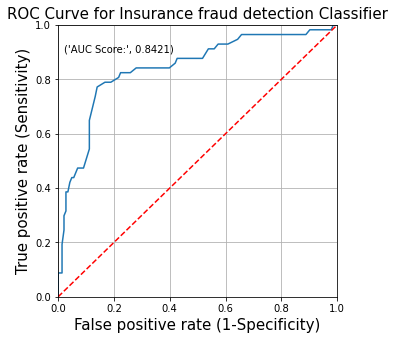

In [41]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
y_pred_prob = model.predict_proba(x_test)[:,1]

# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(model)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
!pip install lightgbm
!pip install catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

compare={"KNN":KNeighborsClassifier(),"DTC":DecisionTreeClassifier(),"RFC":RandomForestClassifier(),"Adaboost":AdaBoostClassifier(),"xgboost":XGBClassifier(),
         "Gradientboost":GradientBoostingClassifier(),"lgbm":LGBMClassifier(),"cboost":CatBoostClassifier(),"svc":SVC()}
results_score={}

for model_name,model in compare.items():
  model.fit(x_train,y_train)
  results_score[model_name]=model.score(x_test,y_test)
for i in results_score.items():
  print(i)

     |████████████████████████████████| 76.1 MB 1.2 MB/s 
Learning rate set to 0.009366
0:	learn: 0.6830806	total: 54.7ms	remaining: 54.6s
1:	learn: 0.6732109	total: 62ms	remaining: 30.9s
2:	learn: 0.6639240	total: 78.7ms	remaining: 26.1s
3:	learn: 0.6545625	total: 92.2ms	remaining: 23s
4:	learn: 0.6501301	total: 113ms	remaining: 22.5s
5:	learn: 0.6404855	total: 127ms	remaining: 21.1s
6:	learn: 0.6350564	total: 136ms	remaining: 19.4s
7:	learn: 0.6309115	total: 147ms	remaining: 18.2s
8:	learn: 0.6223497	total: 161ms	remaining: 17.7s
9:	learn: 0.6139760	total: 178ms	remaining: 17.6s
10:	learn: 0.6102736	total: 191ms	remaining: 17.2s
11:	learn: 0.6024358	total: 214ms	remaining: 17.6s
12:	learn: 0.5975806	total: 228ms	remaining: 17.3s
13:	learn: 0.5927393	total: 244ms	remaining: 17.1s
14:	learn: 0.5851279	total: 259ms	remaining: 17s
15:	learn: 0.5782499	total: 271ms	remaining: 16.6s
16:	learn: 0.5752336	total: 285ms	remaining: 16.5s
17:	learn: 0.5679150	total: 299ms	remaining: 16.3s
18:	le

In [37]:
#### Printing it separately to showcase the result

for i in results_score.items():
  print(i)

('KNN', 0.69)
('DTC', 0.76)
('RFC', 0.765)
('Adaboost', 0.795)
('xgboost', 0.805)
('Gradientboost', 0.825)
('lgbm', 0.83)
('cboost', 0.81)
('svc', 0.775)


Training Accuracy:  0.955
Testing Accuarcy:  0.815
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       143
           1       0.73      0.56      0.63        57

    accuracy                           0.81       200
   macro avg       0.78      0.74      0.75       200
weighted avg       0.81      0.81      0.81       200

[[131  12]
 [ 25  32]]


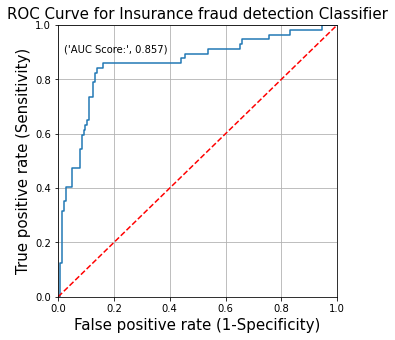

In [42]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='dart',num_leaves=45,min_child_samples=41)

lgbm.fit(x_train, y_train)
y_pred_rf = lgbm.predict(x_test)

print("Training Accuracy: ", lgbm.score(x_train, y_train))
print('Testing Accuarcy: ', lgbm.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

y_pred_prob = lgbm.predict_proba(x_test)[:,1]

# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(lgbm)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

def get_models():
  models = dict()
  types = ['gbdt','goss','dart']
  for t in types:
    models[t]=LGBMClassifier(boosting_type=t)
  return models


def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>gbdt 0.832 (0.029)
>goss 0.829 (0.028)
>dart 0.835 (0.026)


From the above model creation it looks like LightGBM , catboost, Gradient boost, XGboost, and Balanced Randomforrest classifier all gives more than 80% accuracy with default model. 
Will be performing hyperparameter tuning for the selected models only

In [36]:
### Using optuna with lightgbm tuner for quicker results

!pip install optuna
import optuna
from optuna.integration.lightgbm import LightGBMTunerCV


     |████████████████████████████████| 308 kB 5.5 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 210 kB 39.1 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 150 kB 36.0 MB/s 
     |████████████████████████████████| 113 kB 46.2 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=66de8fd83751013d0ef3211a8246fd959aaedd1ad5bf640ad7647d4f7d43203a
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [37]:
import sklearn
from sklearn.model_selection import RepeatedKFold


def objective(trial):
    dtrain = lgb.Dataset(x_train, label=y_train)


    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    print("The accuracy is ",accuracy)
    print("classification report is",classification_report(y_test,  pred_labels))
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
 
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)



[I 2022-02-24 16:28:18,307] A new study created in memory with name: no-name-ca03b692-6c5c-49c7-942e-62ab90425176
[I 2022-02-24 16:28:18,505] Trial 0 finished with value: 0.79 and parameters: {'lambda_l1': 4.013905863904584, 'num_leaves': 228, 'feature_fraction': 0.8110814926520598, 'bagging_fraction': 0.8703466756542713, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 0 with value: 0.79.
[I 2022-02-24 16:28:18,675] Trial 1 finished with value: 0.795 and parameters: {'lambda_l1': 5.406263435925828e-05, 'num_leaves': 222, 'feature_fraction': 0.5000657454006672, 'bagging_fraction': 0.4531284614469552, 'bagging_freq': 5, 'min_child_samples': 59}. Best is trial 1 with value: 0.795.


The accuracy is  0.79
classification report is               precision    recall  f1-score   support

           0       0.80      0.94      0.87       143
           1       0.74      0.40      0.52        57

    accuracy                           0.79       200
   macro avg       0.77      0.67      0.69       200
weighted avg       0.78      0.79      0.77       200

The accuracy is  0.795
classification report is               precision    recall  f1-score   support

           0       0.80      0.94      0.87       143
           1       0.75      0.42      0.54        57

    accuracy                           0.80       200
   macro avg       0.78      0.68      0.70       200
weighted avg       0.79      0.80      0.77       200



[I 2022-02-24 16:28:18,873] Trial 2 finished with value: 0.825 and parameters: {'lambda_l1': 0.8083361824590655, 'num_leaves': 63, 'feature_fraction': 0.49130029589336754, 'bagging_fraction': 0.8273249699773595, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 2 with value: 0.825.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.51      0.62        57

    accuracy                           0.82       200
   macro avg       0.82      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:19,099] Trial 3 finished with value: 0.79 and parameters: {'lambda_l1': 0.08692418937437621, 'num_leaves': 228, 'feature_fraction': 0.6877471165413989, 'bagging_fraction': 0.7243248919234708, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 2 with value: 0.825.
[I 2022-02-24 16:28:19,224] Trial 4 finished with value: 0.805 and parameters: {'lambda_l1': 2.2751263828324025e-05, 'num_leaves': 155, 'feature_fraction': 0.7250201915810214, 'bagging_fraction': 0.7203265216579573, 'bagging_freq': 1, 'min_child_samples': 97}. Best is trial 2 with value: 0.825.


The accuracy is  0.79
classification report is               precision    recall  f1-score   support

           0       0.80      0.94      0.86       143
           1       0.73      0.42      0.53        57

    accuracy                           0.79       200
   macro avg       0.76      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200

The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.81      0.96      0.88       143
           1       0.80      0.42      0.55        57

    accuracy                           0.81       200
   macro avg       0.80      0.69      0.71       200
weighted avg       0.80      0.81      0.78       200



[I 2022-02-24 16:28:19,374] Trial 5 finished with value: 0.84 and parameters: {'lambda_l1': 1.8400225899334706, 'num_leaves': 52, 'feature_fraction': 0.9463818201160169, 'bagging_fraction': 0.8781618041089687, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:19,453] Trial 6 finished with value: 0.8 and parameters: {'lambda_l1': 1.1440715517540996, 'num_leaves': 190, 'feature_fraction': 0.9973573940884208, 'bagging_fraction': 0.4871300676257299, 'bagging_freq': 5, 'min_child_samples': 97}. Best is trial 5 with value: 0.84.


The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.84      0.96      0.90       143
           1       0.84      0.54      0.66        57

    accuracy                           0.84       200
   macro avg       0.84      0.75      0.78       200
weighted avg       0.84      0.84      0.83       200

The accuracy is  0.8
classification report is               precision    recall  f1-score   support

           0       0.80      0.96      0.87       143
           1       0.79      0.40      0.53        57

    accuracy                           0.80       200
   macro avg       0.80      0.68      0.70       200
weighted avg       0.80      0.80      0.78       200



[I 2022-02-24 16:28:19,595] Trial 7 finished with value: 0.785 and parameters: {'lambda_l1': 3.7308535322605753e-08, 'num_leaves': 176, 'feature_fraction': 0.6127299971848958, 'bagging_fraction': 0.4035223100327749, 'bagging_freq': 7, 'min_child_samples': 21}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:19,697] Trial 8 finished with value: 0.81 and parameters: {'lambda_l1': 1.630993955416046e-07, 'num_leaves': 178, 'feature_fraction': 0.6295997686289597, 'bagging_fraction': 0.7544148725619004, 'bagging_freq': 4, 'min_child_samples': 92}. Best is trial 5 with value: 0.84.


The accuracy is  0.785
classification report is               precision    recall  f1-score   support

           0       0.79      0.94      0.86       143
           1       0.73      0.39      0.51        57

    accuracy                           0.79       200
   macro avg       0.76      0.67      0.68       200
weighted avg       0.78      0.79      0.76       200

The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.81      0.96      0.88       143
           1       0.81      0.44      0.57        57

    accuracy                           0.81       200
   macro avg       0.81      0.70      0.72       200
weighted avg       0.81      0.81      0.79       200

The accuracy is  0.78
classification report is               precision    recall  f1-score   support

           0       0.79      0.94      0.86       143
           1       0.71      0.39      0.50        57

    accuracy                           0

[I 2022-02-24 16:28:19,779] Trial 9 finished with value: 0.78 and parameters: {'lambda_l1': 0.0015718846464029092, 'num_leaves': 110, 'feature_fraction': 0.4154959867562268, 'bagging_fraction': 0.7133918682430203, 'bagging_freq': 3, 'min_child_samples': 83}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:19,893] Trial 10 finished with value: 0.815 and parameters: {'lambda_l1': 0.009134628777088809, 'num_leaves': 4, 'feature_fraction': 0.9885326650749612, 'bagging_fraction': 0.9727998836889663, 'bagging_freq': 7, 'min_child_samples': 30}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:19,993] Trial 11 finished with value: 0.84 and parameters: {'lambda_l1': 7.099181067278666, 'num_leaves': 51, 'feature_fraction': 0.8562683726689446, 'bagging_fraction': 0.8578401000023035, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.84      0.92      0.88       143
           1       0.73      0.56      0.63        57

    accuracy                           0.81       200
   macro avg       0.78      0.74      0.75       200
weighted avg       0.81      0.81      0.81       200

The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.56      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200

The accuracy is  0.82


[I 2022-02-24 16:28:20,104] Trial 12 finished with value: 0.82 and parameters: {'lambda_l1': 6.157241684697616, 'num_leaves': 44, 'feature_fraction': 0.8746867108638557, 'bagging_fraction': 0.9696419633705462, 'bagging_freq': 6, 'min_child_samples': 40}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:20,250] Trial 13 finished with value: 0.835 and parameters: {'lambda_l1': 0.04327484803890485, 'num_leaves': 93, 'feature_fraction': 0.8781719506876735, 'bagging_fraction': 0.8680813960496603, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:20,300] Trial 14 finished with value: 0.805 and parameters: {'lambda_l1': 0.213038882616195, 'num_leaves': 2, 'feature_fraction': 0.9034027412583377, 'bagging_fraction': 0.5823668303712741, 'bagging_freq': 6, 'min_child_samples': 8}. Best is trial 5 with value: 0.84.


classification report is               precision    recall  f1-score   support

           0       0.82      0.96      0.88       143
           1       0.82      0.47      0.60        57

    accuracy                           0.82       200
   macro avg       0.82      0.72      0.74       200
weighted avg       0.82      0.82      0.80       200

The accuracy is  0.835
classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.80      0.56      0.66        57

    accuracy                           0.83       200
   macro avg       0.82      0.75      0.78       200
weighted avg       0.83      0.83      0.83       200

The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.80      0.97      0.88       143
           1       0.82      0.40      0.54        57

    accuracy                           0.81       200
   macr

[I 2022-02-24 16:28:20,396] Trial 15 finished with value: 0.76 and parameters: {'lambda_l1': 9.468887018524882, 'num_leaves': 54, 'feature_fraction': 0.7894830342862611, 'bagging_fraction': 0.6220765537138755, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:20,554] Trial 16 finished with value: 0.815 and parameters: {'lambda_l1': 2.2752641381658865e-06, 'num_leaves': 32, 'feature_fraction': 0.9273364006299928, 'bagging_fraction': 0.8129753641833626, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 5 with value: 0.84.


The accuracy is  0.76
classification report is               precision    recall  f1-score   support

           0       0.76      0.97      0.85       143
           1       0.76      0.23      0.35        57

    accuracy                           0.76       200
   macro avg       0.76      0.60      0.60       200
weighted avg       0.76      0.76      0.71       200

The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.78      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.80      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:20,710] Trial 17 finished with value: 0.825 and parameters: {'lambda_l1': 0.0018263024140184698, 'num_leaves': 84, 'feature_fraction': 0.8033408171035897, 'bagging_fraction': 0.9173535367846086, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:20,898] Trial 18 finished with value: 0.785 and parameters: {'lambda_l1': 0.010533219243036317, 'num_leaves': 123, 'feature_fraction': 0.9547896378864793, 'bagging_fraction': 0.639004327553601, 'bagging_freq': 6, 'min_child_samples': 26}. Best is trial 5 with value: 0.84.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.96      0.89       143
           1       0.82      0.49      0.62        57

    accuracy                           0.82       200
   macro avg       0.82      0.72      0.75       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.785
classification report is               precision    recall  f1-score   support

           0       0.79      0.94      0.86       143
           1       0.73      0.39      0.51        57

    accuracy                           0.79       200
   macro avg       0.76      0.67      0.68       200
weighted avg       0.78      0.79      0.76       200



[I 2022-02-24 16:28:21,107] Trial 19 finished with value: 0.775 and parameters: {'lambda_l1': 0.4148670106014495, 'num_leaves': 77, 'feature_fraction': 0.8430577266556135, 'bagging_fraction': 0.7935180277064781, 'bagging_freq': 5, 'min_child_samples': 67}. Best is trial 5 with value: 0.84.


The accuracy is  0.775
classification report is               precision    recall  f1-score   support

           0       0.78      0.95      0.86       143
           1       0.73      0.33      0.46        57

    accuracy                           0.78       200
   macro avg       0.76      0.64      0.66       200
weighted avg       0.77      0.78      0.74       200

The accuracy is  0.81


[I 2022-02-24 16:28:21,308] Trial 20 finished with value: 0.81 and parameters: {'lambda_l1': 0.00014744957008787916, 'num_leaves': 26, 'feature_fraction': 0.735379282499177, 'bagging_fraction': 0.8955612863891669, 'bagging_freq': 7, 'min_child_samples': 17}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:21,454] Trial 21 finished with value: 0.825 and parameters: {'lambda_l1': 0.06405447670238418, 'num_leaves': 98, 'feature_fraction': 0.8674871126340146, 'bagging_fraction': 0.8527053279865414, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 5 with value: 0.84.


classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.76      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.80      0.81      0.80       200

The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:21,593] Trial 22 finished with value: 0.83 and parameters: {'lambda_l1': 0.08670652825638311, 'num_leaves': 144, 'feature_fraction': 0.9225531922429788, 'bagging_fraction': 0.9258975839959648, 'bagging_freq': 6, 'min_child_samples': 57}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:21,731] Trial 23 finished with value: 0.83 and parameters: {'lambda_l1': 1.4872570174716853, 'num_leaves': 78, 'feature_fraction': 0.8487104447540684, 'bagging_fraction': 0.9888774215248379, 'bagging_freq': 5, 'min_child_samples': 48}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200

The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:21,859] Trial 24 finished with value: 0.815 and parameters: {'lambda_l1': 0.027395000866813644, 'num_leaves': 101, 'feature_fraction': 0.7603683707759915, 'bagging_fraction': 0.7757646069595422, 'bagging_freq': 6, 'min_child_samples': 38}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:21,996] Trial 25 finished with value: 0.84 and parameters: {'lambda_l1': 0.0021534502133413744, 'num_leaves': 60, 'feature_fraction': 0.9538576002263606, 'bagging_fraction': 0.9205338603046047, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.95      0.88       143
           1       0.79      0.47      0.59        57

    accuracy                           0.81       200
   macro avg       0.81      0.71      0.74       200
weighted avg       0.81      0.81      0.80       200

The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.56      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200



[I 2022-02-24 16:28:22,116] Trial 26 finished with value: 0.81 and parameters: {'lambda_l1': 0.0016193232252538227, 'num_leaves': 24, 'feature_fraction': 0.9539750158707483, 'bagging_fraction': 0.9382265977384618, 'bagging_freq': 3, 'min_child_samples': 74}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:22,243] Trial 27 finished with value: 0.84 and parameters: {'lambda_l1': 3.291430678905799e-06, 'num_leaves': 54, 'feature_fraction': 0.9993989871563359, 'bagging_fraction': 0.8484061165365068, 'bagging_freq': 4, 'min_child_samples': 52}. Best is trial 5 with value: 0.84.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.76      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.80      0.81      0.80       200

The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89       143
           1       0.80      0.58      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200



[I 2022-02-24 16:28:22,365] Trial 28 finished with value: 0.8 and parameters: {'lambda_l1': 2.82131573057883e-06, 'num_leaves': 69, 'feature_fraction': 0.9878860313607759, 'bagging_fraction': 0.8160282344243522, 'bagging_freq': 4, 'min_child_samples': 62}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:22,475] Trial 29 finished with value: 0.83 and parameters: {'lambda_l1': 5.970405990029965e-06, 'num_leaves': 38, 'feature_fraction': 0.9435808511293887, 'bagging_fraction': 0.8874986009728377, 'bagging_freq': 4, 'min_child_samples': 79}. Best is trial 5 with value: 0.84.


The accuracy is  0.8
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.76      0.44      0.56        57

    accuracy                           0.80       200
   macro avg       0.78      0.69      0.71       200
weighted avg       0.79      0.80      0.78       200

The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.82      0.97      0.89       143
           1       0.87      0.47      0.61        57

    accuracy                           0.83       200
   macro avg       0.85      0.72      0.75       200
weighted avg       0.84      0.83      0.81       200



[I 2022-02-24 16:28:22,591] Trial 30 finished with value: 0.81 and parameters: {'lambda_l1': 2.5894842780144535e-07, 'num_leaves': 255, 'feature_fraction': 0.908921276055969, 'bagging_fraction': 0.6596829076395488, 'bagging_freq': 2, 'min_child_samples': 55}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:22,741] Trial 31 finished with value: 0.82 and parameters: {'lambda_l1': 0.00028366321417803514, 'num_leaves': 54, 'feature_fraction': 0.9613483348797858, 'bagging_fraction': 0.8504234320481476, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 5 with value: 0.84.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.76      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.80      0.81      0.80       200

The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.78      0.51      0.62        57

    accuracy                           0.82       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:22,941] Trial 32 finished with value: 0.815 and parameters: {'lambda_l1': 3.6155001479605535, 'num_leaves': 16, 'feature_fraction': 0.8225550219444275, 'bagging_fraction': 0.9358598213244749, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.78      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.80      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:23,161] Trial 33 finished with value: 0.825 and parameters: {'lambda_l1': 2.017443404048559e-05, 'num_leaves': 55, 'feature_fraction': 0.895181334473484, 'bagging_fraction': 0.8452849032016114, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:23,344] Trial 34 finished with value: 0.795 and parameters: {'lambda_l1': 4.3709293669520887e-07, 'num_leaves': 64, 'feature_fraction': 0.9963835027510382, 'bagging_fraction': 0.7597892721548583, 'bagging_freq': 4, 'min_child_samples': 60}. Best is trial 5 with value: 0.84.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.795
classification report is               precision    recall  f1-score   support

           0       0.81      0.93      0.87       143
           1       0.72      0.46      0.56        57

    accuracy                           0.80       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.79      0.80      0.78       200



[I 2022-02-24 16:28:23,516] Trial 35 finished with value: 0.79 and parameters: {'lambda_l1': 1.9924096868364571, 'num_leaves': 44, 'feature_fraction': 0.680182982785718, 'bagging_fraction': 0.8883312348215444, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 5 with value: 0.84.


The accuracy is  0.79
classification report is               precision    recall  f1-score   support

           0       0.80      0.94      0.86       143
           1       0.73      0.42      0.53        57

    accuracy                           0.79       200
   macro avg       0.76      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



[I 2022-02-24 16:28:23,779] Trial 36 finished with value: 0.83 and parameters: {'lambda_l1': 0.3379876668245654, 'num_leaves': 121, 'feature_fraction': 0.9579425701909405, 'bagging_fraction': 0.9569177678476465, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200

The accuracy is  0.805

[I 2022-02-24 16:28:23,982] Trial 37 finished with value: 0.805 and parameters: {'lambda_l1': 5.45146283117967e-05, 'num_leaves': 86, 'feature_fraction': 0.564209648563939, 'bagging_fraction': 0.9997030025977705, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 5 with value: 0.84.



classification report is               precision    recall  f1-score   support

           0       0.82      0.93      0.87       143
           1       0.74      0.49      0.59        57

    accuracy                           0.81       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:24,233] Trial 38 finished with value: 0.835 and parameters: {'lambda_l1': 0.004297047139623017, 'num_leaves': 139, 'feature_fraction': 0.9253758418720495, 'bagging_fraction': 0.9047016081647424, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:24,407] Trial 39 finished with value: 0.8 and parameters: {'lambda_l1': 0.6145367384459354, 'num_leaves': 15, 'feature_fraction': 0.775734347722544, 'bagging_fraction': 0.6856741510784108, 'bagging_freq': 4, 'min_child_samples': 73}. Best is trial 5 with value: 0.84.


The accuracy is  0.835
classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.80      0.56      0.66        57

    accuracy                           0.83       200
   macro avg       0.82      0.75      0.78       200
weighted avg       0.83      0.83      0.83       200

The accuracy is  0.8
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.74      0.46      0.57        57

    accuracy                           0.80       200
   macro avg       0.78      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



[I 2022-02-24 16:28:24,578] Trial 40 finished with value: 0.77 and parameters: {'lambda_l1': 3.054967381687438e-08, 'num_leaves': 71, 'feature_fraction': 0.8252648656725199, 'bagging_fraction': 0.5173326588220677, 'bagging_freq': 3, 'min_child_samples': 62}. Best is trial 5 with value: 0.84.


The accuracy is  0.77
classification report is               precision    recall  f1-score   support

           0       0.78      0.94      0.85       143
           1       0.69      0.35      0.47        57

    accuracy                           0.77       200
   macro avg       0.74      0.64      0.66       200
weighted avg       0.76      0.77      0.74       200



[I 2022-02-24 16:28:24,856] Trial 41 finished with value: 0.825 and parameters: {'lambda_l1': 0.0051642076326517145, 'num_leaves': 141, 'feature_fraction': 0.9260376920386679, 'bagging_fraction': 0.9011165996252177, 'bagging_freq': 5, 'min_child_samples': 43}. Best is trial 5 with value: 0.84.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:25,113] Trial 42 finished with value: 0.815 and parameters: {'lambda_l1': 0.0003181647637137381, 'num_leaves': 174, 'feature_fraction': 0.9724125381503337, 'bagging_fraction': 0.8323102350635343, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.76      0.51      0.61        57

    accuracy                           0.81       200
   macro avg       0.80      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:25,455] Trial 43 finished with value: 0.83 and parameters: {'lambda_l1': 0.0006146265795982458, 'num_leaves': 163, 'feature_fraction': 0.8840084534586197, 'bagging_fraction': 0.8784722733783344, 'bagging_freq': 5, 'min_child_samples': 31}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:25,771] Trial 44 finished with value: 0.82 and parameters: {'lambda_l1': 0.1936419568943834, 'num_leaves': 112, 'feature_fraction': 0.9999478098673307, 'bagging_fraction': 0.7367625934318051, 'bagging_freq': 6, 'min_child_samples': 41}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.82      0.95      0.88       143
           1       0.80      0.49      0.61        57

    accuracy                           0.82       200
   macro avg       0.81      0.72      0.75       200
weighted avg       0.82      0.82      0.80       200



[I 2022-02-24 16:28:26,033] Trial 45 finished with value: 0.82 and parameters: {'lambda_l1': 0.028060467261733325, 'num_leaves': 97, 'feature_fraction': 0.8521759929518312, 'bagging_fraction': 0.7948961371138097, 'bagging_freq': 7, 'min_child_samples': 52}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.78      0.51      0.62        57

    accuracy                           0.82       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:26,265] Trial 46 finished with value: 0.815 and parameters: {'lambda_l1': 3.2828639417049548, 'num_leaves': 54, 'feature_fraction': 0.8859884906859282, 'bagging_fraction': 0.8646585018016963, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.78      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.80      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:26,568] Trial 47 finished with value: 0.795 and parameters: {'lambda_l1': 0.02566934602295498, 'num_leaves': 39, 'feature_fraction': 0.6688323301310609, 'bagging_fraction': 0.9672577299819204, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 5 with value: 0.84.


The accuracy is  0.795
classification report is               precision    recall  f1-score   support

           0       0.82      0.92      0.86       143
           1       0.70      0.49      0.58        57

    accuracy                           0.80       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.78      0.80      0.78       200



[I 2022-02-24 16:28:26,876] Trial 48 finished with value: 0.82 and parameters: {'lambda_l1': 0.004057835889622558, 'num_leaves': 194, 'feature_fraction': 0.9319244744974643, 'bagging_fraction': 0.9109984941248513, 'bagging_freq': 4, 'min_child_samples': 45}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.82      0.95      0.88       143
           1       0.80      0.49      0.61        57

    accuracy                           0.82       200
   macro avg       0.81      0.72      0.75       200
weighted avg       0.82      0.82      0.80       200



[I 2022-02-24 16:28:27,085] Trial 49 finished with value: 0.8 and parameters: {'lambda_l1': 7.439871340913433, 'num_leaves': 88, 'feature_fraction': 0.9739638697170143, 'bagging_fraction': 0.8049652090938021, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:27,264] Trial 50 finished with value: 0.825 and parameters: {'lambda_l1': 7.842107045151334e-05, 'num_leaves': 214, 'feature_fraction': 0.9046938165431067, 'bagging_fraction': 0.9504244463848858, 'bagging_freq': 6, 'min_child_samples': 66}. Best is trial 5 with value: 0.84.


The accuracy is  0.8
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.76      0.44      0.56        57

    accuracy                           0.80       200
   macro avg       0.78      0.69      0.71       200
weighted avg       0.79      0.80      0.78       200

The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.84      0.93      0.88       143
           1       0.76      0.56      0.65        57

    accuracy                           0.82       200
   macro avg       0.80      0.75      0.77       200
weighted avg       0.82      0.82      0.82       200



[I 2022-02-24 16:28:27,527] Trial 51 finished with value: 0.805 and parameters: {'lambda_l1': 0.01378093233254836, 'num_leaves': 143, 'feature_fraction': 0.4077450200316947, 'bagging_fraction': 0.8673273191850888, 'bagging_freq': 6, 'min_child_samples': 45}. Best is trial 5 with value: 0.84.


The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.87       143
           1       0.75      0.47      0.58        57

    accuracy                           0.81       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:27,856] Trial 52 finished with value: 0.815 and parameters: {'lambda_l1': 0.001086326649768386, 'num_leaves': 62, 'feature_fraction': 0.9395273974940881, 'bagging_fraction': 0.8302658524921571, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.83      0.93      0.88       143
           1       0.75      0.53      0.62        57

    accuracy                           0.81       200
   macro avg       0.79      0.73      0.75       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:28,332] Trial 53 finished with value: 0.82 and parameters: {'lambda_l1': 1.3383196202680318e-08, 'num_leaves': 49, 'feature_fraction': 0.8719300762024549, 'bagging_fraction': 0.906772868089695, 'bagging_freq': 6, 'min_child_samples': 40}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.78      0.51      0.62        57

    accuracy                           0.82       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.815


[I 2022-02-24 16:28:28,511] Trial 54 finished with value: 0.815 and parameters: {'lambda_l1': 0.004456072183016707, 'num_leaves': 108, 'feature_fraction': 0.4460022246432328, 'bagging_fraction': 0.9259378843512236, 'bagging_freq': 5, 'min_child_samples': 45}. Best is trial 5 with value: 0.84.


classification report is               precision    recall  f1-score   support

           0       0.82      0.96      0.88       143
           1       0.81      0.46      0.58        57

    accuracy                           0.81       200
   macro avg       0.81      0.71      0.73       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:28,833] Trial 55 finished with value: 0.805 and parameters: {'lambda_l1': 1.007937356293732, 'num_leaves': 30, 'feature_fraction': 0.9736069543895238, 'bagging_fraction': 0.7754952617559887, 'bagging_freq': 7, 'min_child_samples': 35}. Best is trial 5 with value: 0.84.


The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.82      0.92      0.87       143
           1       0.72      0.51      0.60        57

    accuracy                           0.81       200
   macro avg       0.77      0.72      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:29,055] Trial 56 finished with value: 0.84 and parameters: {'lambda_l1': 0.05391049373166635, 'num_leaves': 76, 'feature_fraction': 0.9161299552149514, 'bagging_fraction': 0.856664834840014, 'bagging_freq': 6, 'min_child_samples': 58}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:29,233] Trial 57 finished with value: 0.785 and parameters: {'lambda_l1': 0.18769372667512566, 'num_leaves': 131, 'feature_fraction': 0.9126668195037553, 'bagging_fraction': 0.40570902334173037, 'bagging_freq': 4, 'min_child_samples': 56}. Best is trial 5 with value: 0.84.


The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.56      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200

The accuracy is  0.785
classification report is               precision    recall  f1-score   support

           0       0.79      0.95      0.86       143
           1       0.75      0.37      0.49        57

    accuracy                           0.79       200
   macro avg       0.77      0.66      0.68       200
weighted avg       0.78      0.79      0.76       200



[I 2022-02-24 16:28:29,508] Trial 58 finished with value: 0.805 and parameters: {'lambda_l1': 1.719607773228893e-05, 'num_leaves': 79, 'feature_fraction': 0.9404412354079164, 'bagging_fraction': 0.8349215509075186, 'bagging_freq': 6, 'min_child_samples': 64}. Best is trial 5 with value: 0.84.


The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.81      0.95      0.87       143
           1       0.78      0.44      0.56        57

    accuracy                           0.81       200
   macro avg       0.80      0.69      0.72       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:29,755] Trial 59 finished with value: 0.795 and parameters: {'lambda_l1': 0.09745296163610229, 'num_leaves': 66, 'feature_fraction': 0.8622106411248855, 'bagging_fraction': 0.8630676383011102, 'bagging_freq': 5, 'min_child_samples': 90}. Best is trial 5 with value: 0.84.


The accuracy is  0.795
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.74      0.44      0.55        57

    accuracy                           0.80       200
   macro avg       0.77      0.69      0.71       200
weighted avg       0.79      0.80      0.78       200



[I 2022-02-24 16:28:30,006] Trial 60 finished with value: 0.815 and parameters: {'lambda_l1': 0.002849982080846003, 'num_leaves': 15, 'feature_fraction': 0.8360175079263246, 'bagging_fraction': 0.9812777306851077, 'bagging_freq': 7, 'min_child_samples': 60}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.84      0.92      0.88       143
           1       0.74      0.54      0.63        57

    accuracy                           0.81       200
   macro avg       0.79      0.73      0.75       200
weighted avg       0.81      0.81      0.81       200



[I 2022-02-24 16:28:30,303] Trial 61 finished with value: 0.84 and parameters: {'lambda_l1': 0.045036772488189214, 'num_leaves': 94, 'feature_fraction': 0.8938575945553257, 'bagging_fraction': 0.8928396679017985, 'bagging_freq': 6, 'min_child_samples': 48}. Best is trial 5 with value: 0.84.


The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.56      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200



[I 2022-02-24 16:28:30,550] Trial 62 finished with value: 0.82 and parameters: {'lambda_l1': 0.007520375842347852, 'num_leaves': 71, 'feature_fraction': 0.9077842567720751, 'bagging_fraction': 0.9392370100907411, 'bagging_freq': 6, 'min_child_samples': 49}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.77      0.53      0.62        57

    accuracy                           0.82       200
   macro avg       0.80      0.73      0.75       200
weighted avg       0.81      0.82      0.81       200



[I 2022-02-24 16:28:30,784] Trial 63 finished with value: 0.82 and parameters: {'lambda_l1': 0.056283880762519, 'num_leaves': 86, 'feature_fraction': 0.8869478978398401, 'bagging_fraction': 0.8716679568131408, 'bagging_freq': 6, 'min_child_samples': 54}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:30,955] Trial 64 finished with value: 0.805 and parameters: {'lambda_l1': 2.0264757877457735, 'num_leaves': 93, 'feature_fraction': 0.9795753262933697, 'bagging_fraction': 0.8140052602979754, 'bagging_freq': 7, 'min_child_samples': 69}. Best is trial 5 with value: 0.84.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.88       143
           1       0.78      0.51      0.62        57

    accuracy                           0.82       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.81      0.95      0.87       143
           1       0.78      0.44      0.56        57

    accuracy                           0.81       200
   macro avg       0.80      0.69      0.72       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:31,243] Trial 65 finished with value: 0.83 and parameters: {'lambda_l1': 0.001074380683453041, 'num_leaves': 39, 'feature_fraction': 0.9498980118802752, 'bagging_fraction': 0.9141641119377482, 'bagging_freq': 6, 'min_child_samples': 58}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.78      0.56      0.65        57

    accuracy                           0.83       200
   macro avg       0.81      0.75      0.77       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:31,547] Trial 66 finished with value: 0.83 and parameters: {'lambda_l1': 0.01589771966048875, 'num_leaves': 59, 'feature_fraction': 0.7984800614020025, 'bagging_fraction': 0.8864845457920193, 'bagging_freq': 4, 'min_child_samples': 47}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:31,713] Trial 67 finished with value: 0.825 and parameters: {'lambda_l1': 0.7281307254478196, 'num_leaves': 77, 'feature_fraction': 0.7188672369684652, 'bagging_fraction': 0.8483868834209612, 'bagging_freq': 7, 'min_child_samples': 51}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.96      0.89       143
           1       0.83      0.51      0.63        57

    accuracy                           0.83       200
   macro avg       0.83      0.73      0.76       200
weighted avg       0.83      0.83      0.82       200

The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:31,959] Trial 68 finished with value: 0.81 and parameters: {'lambda_l1': 4.711027674975722, 'num_leaves': 45, 'feature_fraction': 0.9217326565522937, 'bagging_fraction': 0.5775743830865243, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 5 with value: 0.84.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.77      0.47      0.59        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200

The accuracy is  0.81


[I 2022-02-24 16:28:32,161] Trial 69 finished with value: 0.81 and parameters: {'lambda_l1': 7.853034938890818e-07, 'num_leaves': 109, 'feature_fraction': 0.5423256251187822, 'bagging_fraction': 0.9485279777737603, 'bagging_freq': 6, 'min_child_samples': 55}. Best is trial 5 with value: 0.84.


classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.77      0.47      0.59        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:32,454] Trial 70 finished with value: 0.815 and parameters: {'lambda_l1': 0.11557525801886383, 'num_leaves': 153, 'feature_fraction': 0.9624746395020991, 'bagging_fraction': 0.7792756469173351, 'bagging_freq': 5, 'min_child_samples': 47}. Best is trial 5 with value: 0.84.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.96      0.88       143
           1       0.81      0.46      0.58        57

    accuracy                           0.81       200
   macro avg       0.81      0.71      0.73       200
weighted avg       0.81      0.81      0.80       200



[I 2022-02-24 16:28:32,738] Trial 71 finished with value: 0.825 and parameters: {'lambda_l1': 0.04683744329225054, 'num_leaves': 128, 'feature_fraction': 0.8974798653902585, 'bagging_fraction': 0.8858896502947982, 'bagging_freq': 6, 'min_child_samples': 43}. Best is trial 5 with value: 0.84.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200



[I 2022-02-24 16:28:33,086] Trial 72 finished with value: 0.81 and parameters: {'lambda_l1': 0.38635497321145473, 'num_leaves': 117, 'feature_fraction': 0.8620624020511767, 'bagging_fraction': 0.9225430777692575, 'bagging_freq': 6, 'min_child_samples': 37}. Best is trial 5 with value: 0.84.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.83      0.93      0.88       143
           1       0.74      0.51      0.60        57

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.80       200



[I 2022-02-24 16:28:33,330] Trial 73 finished with value: 0.83 and parameters: {'lambda_l1': 0.0004489692360351842, 'num_leaves': 102, 'feature_fraction': 0.8145115770445546, 'bagging_fraction': 0.8993003748825739, 'bagging_freq': 6, 'min_child_samples': 50}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:33,612] Trial 74 finished with value: 0.825 and parameters: {'lambda_l1': 0.029978354708829855, 'num_leaves': 50, 'feature_fraction': 0.9161137911943948, 'bagging_fraction': 0.8514766472136568, 'bagging_freq': 4, 'min_child_samples': 42}. Best is trial 5 with value: 0.84.
[I 2022-02-24 16:28:33,793] Trial 75 finished with value: 0.805 and parameters: {'lambda_l1': 0.002455378749911977, 'num_leaves': 74, 'feature_fraction': 0.9471416072050157, 'bagging_fraction': 0.8214672368559178, 'bagging_freq': 5, 'min_child_samples': 62}. Best is trial 5 with value: 0.84.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.87       143
           1       0.75      0.47      0.58        57

    accuracy                           0.81       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:34,083] Trial 76 finished with value: 0.83 and parameters: {'lambda_l1': 8.836741417911182e-08, 'num_leaves': 60, 'feature_fraction': 0.9907682241814852, 'bagging_fraction': 0.8997090551787006, 'bagging_freq': 5, 'min_child_samples': 54}. Best is trial 5 with value: 0.84.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.79      0.54      0.65        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.77       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:34,352] Trial 77 finished with value: 0.835 and parameters: {'lambda_l1': 0.01023737488363644, 'num_leaves': 91, 'feature_fraction': 0.9314342286549864, 'bagging_fraction': 0.9662874345435305, 'bagging_freq': 3, 'min_child_samples': 46}. Best is trial 5 with value: 0.84.


The accuracy is  0.835
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.54      0.65        57

    accuracy                           0.83       200
   macro avg       0.83      0.75      0.77       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:34,702] Trial 78 finished with value: 0.845 and parameters: {'lambda_l1': 1.9934368699840848, 'num_leaves': 22, 'feature_fraction': 0.8329762498052657, 'bagging_fraction': 0.8392320432237224, 'bagging_freq': 4, 'min_child_samples': 33}. Best is trial 78 with value: 0.845.


The accuracy is  0.845
classification report is               precision    recall  f1-score   support

           0       0.85      0.96      0.90       143
           1       0.84      0.56      0.67        57

    accuracy                           0.84       200
   macro avg       0.84      0.76      0.79       200
weighted avg       0.84      0.84      0.83       200



[I 2022-02-24 16:28:34,962] Trial 79 finished with value: 0.825 and parameters: {'lambda_l1': 2.4130246863142273, 'num_leaves': 22, 'feature_fraction': 0.8494020660880004, 'bagging_fraction': 0.752696901466747, 'bagging_freq': 4, 'min_child_samples': 28}. Best is trial 78 with value: 0.845.
[I 2022-02-24 16:28:35,134] Trial 80 finished with value: 0.84 and parameters: {'lambda_l1': 7.204826448004793, 'num_leaves': 35, 'feature_fraction': 0.7551740145570688, 'bagging_fraction': 0.8354976478995292, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 78 with value: 0.845.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89       143
           1       0.80      0.58      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200



[I 2022-02-24 16:28:35,277] Trial 81 finished with value: 0.83 and parameters: {'lambda_l1': 9.333408372933057, 'num_leaves': 34, 'feature_fraction': 0.7830670772417275, 'bagging_fraction': 0.9671501326601186, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 78 with value: 0.845.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:35,507] Trial 82 finished with value: 0.82 and parameters: {'lambda_l1': 1.3532384083195639, 'num_leaves': 24, 'feature_fraction': 0.8352342417445481, 'bagging_fraction': 0.8390426841342282, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 78 with value: 0.845.
[I 2022-02-24 16:28:35,666] Trial 83 finished with value: 0.805 and parameters: {'lambda_l1': 3.7311465099630166, 'num_leaves': 8, 'feature_fraction': 0.7530356967999597, 'bagging_fraction': 0.8591901085904948, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 78 with value: 0.845.


The accuracy is  0.82
classification report is               precision    recall  f1-score   support

           0       0.82      0.96      0.88       143
           1       0.82      0.47      0.60        57

    accuracy                           0.82       200
   macro avg       0.82      0.72      0.74       200
weighted avg       0.82      0.82      0.80       200

The accuracy is  0.805
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.76      0.46      0.57        57

    accuracy                           0.81       200
   macro avg       0.79      0.70      0.72       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:35,903] Trial 84 finished with value: 0.815 and parameters: {'lambda_l1': 0.5782006976731296, 'num_leaves': 46, 'feature_fraction': 0.6421841339696411, 'bagging_fraction': 0.7957192593147477, 'bagging_freq': 4, 'min_child_samples': 59}. Best is trial 78 with value: 0.845.


The accuracy is  0.815
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.78      0.49      0.60        57

    accuracy                           0.81       200
   macro avg       0.80      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200

The accuracy is  0.845
classification report is 

[I 2022-02-24 16:28:36,082] Trial 85 finished with value: 0.845 and parameters: {'lambda_l1': 5.0456921359406035, 'num_leaves': 8, 'feature_fraction': 0.7651809590303996, 'bagging_fraction': 0.8756828768112648, 'bagging_freq': 3, 'min_child_samples': 53}. Best is trial 78 with value: 0.845.
[I 2022-02-24 16:28:36,227] Trial 86 finished with value: 0.83 and parameters: {'lambda_l1': 6.591490413683053, 'num_leaves': 9, 'feature_fraction': 0.7540644217684804, 'bagging_fraction': 0.8769766931744885, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 78 with value: 0.845.


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       143
           1       0.82      0.58      0.68        57

    accuracy                           0.84       200
   macro avg       0.84      0.76      0.79       200
weighted avg       0.84      0.84      0.84       200

The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89       143
           1       0.78      0.56      0.65        57

    accuracy                           0.83       200
   macro avg       0.81      0.75      0.77       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:36,447] Trial 87 finished with value: 0.825 and parameters: {'lambda_l1': 1.2282317863536485, 'num_leaves': 36, 'feature_fraction': 0.7400501951988075, 'bagging_fraction': 0.8161470245949455, 'bagging_freq': 3, 'min_child_samples': 60}. Best is trial 78 with value: 0.845.
[I 2022-02-24 16:28:36,570] Trial 88 finished with value: 0.795 and parameters: {'lambda_l1': 2.320840370170917, 'num_leaves': 2, 'feature_fraction': 0.7083139822428963, 'bagging_fraction': 0.841763276644119, 'bagging_freq': 4, 'min_child_samples': 33}. Best is trial 78 with value: 0.845.


The accuracy is  0.825
classification report is               precision    recall  f1-score   support

           0       0.83      0.94      0.89       143
           1       0.79      0.53      0.63        57

    accuracy                           0.82       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200

The accuracy is  0.795
classification report is               precision    recall  f1-score   support

           0       0.79      0.98      0.87       143
           1       0.86      0.33      0.48        57

    accuracy                           0.80       200
   macro avg       0.83      0.66      0.68       200
weighted avg       0.81      0.80      0.76       200



[I 2022-02-24 16:28:36,799] Trial 89 finished with value: 0.765 and parameters: {'lambda_l1': 9.899852035141203, 'num_leaves': 29, 'feature_fraction': 0.768689265731, 'bagging_fraction': 0.9284223047494305, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 78 with value: 0.845.
[I 2022-02-24 16:28:36,936] Trial 90 finished with value: 0.835 and parameters: {'lambda_l1': 5.569285005634695, 'num_leaves': 19, 'feature_fraction': 0.8200868331951408, 'bagging_fraction': 0.8845199941421401, 'bagging_freq': 4, 'min_child_samples': 51}. Best is trial 78 with value: 0.845.


The accuracy is  0.765
classification report is               precision    recall  f1-score   support

           0       0.78      0.94      0.85       143
           1       0.69      0.32      0.43        57

    accuracy                           0.77       200
   macro avg       0.73      0.63      0.64       200
weighted avg       0.75      0.77      0.73       200

The accuracy is  0.835
classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       143
           1       0.82      0.54      0.65        57

    accuracy                           0.83       200
   macro avg       0.83      0.75      0.77       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:37,219] Trial 91 finished with value: 0.85 and parameters: {'lambda_l1': 0.18204388422954523, 'num_leaves': 53, 'feature_fraction': 0.7959845595031398, 'bagging_fraction': 0.8695337771568936, 'bagging_freq': 4, 'min_child_samples': 48}. Best is trial 91 with value: 0.85.


The accuracy is  0.85
classification report is               precision    recall  f1-score   support

           0       0.86      0.95      0.90       143
           1       0.83      0.60      0.69        57

    accuracy                           0.85       200
   macro avg       0.84      0.77      0.80       200
weighted avg       0.85      0.85      0.84       200



[I 2022-02-24 16:28:37,627] Trial 92 finished with value: 0.84 and parameters: {'lambda_l1': 0.2026406758087317, 'num_leaves': 52, 'feature_fraction': 0.7384098905952432, 'bagging_fraction': 0.8581180012706952, 'bagging_freq': 4, 'min_child_samples': 49}. Best is trial 91 with value: 0.85.


The accuracy is  0.84
classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89       143
           1       0.80      0.58      0.67        57

    accuracy                           0.84       200
   macro avg       0.83      0.76      0.78       200
weighted avg       0.84      0.84      0.83       200

The accuracy is  0.835


[I 2022-02-24 16:28:37,810] Trial 93 finished with value: 0.835 and parameters: {'lambda_l1': 0.26924796597881967, 'num_leaves': 42, 'feature_fraction': 0.7296539467903338, 'bagging_fraction': 0.8739927865605956, 'bagging_freq': 4, 'min_child_samples': 56}. Best is trial 91 with value: 0.85.


classification report is               precision    recall  f1-score   support

           0       0.83      0.97      0.89       143
           1       0.85      0.51      0.64        57

    accuracy                           0.83       200
   macro avg       0.84      0.74      0.77       200
weighted avg       0.84      0.83      0.82       200



[I 2022-02-24 16:28:38,074] Trial 94 finished with value: 0.83 and parameters: {'lambda_l1': 0.12229737011216735, 'num_leaves': 57, 'feature_fraction': 0.8058106518899587, 'bagging_fraction': 0.8569508557770407, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 91 with value: 0.85.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:38,317] Trial 95 finished with value: 0.81 and parameters: {'lambda_l1': 3.658087053283633, 'num_leaves': 68, 'feature_fraction': 0.7884387548111327, 'bagging_fraction': 0.799947620868753, 'bagging_freq': 2, 'min_child_samples': 20}. Best is trial 91 with value: 0.85.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.82      0.94      0.88       143
           1       0.77      0.47      0.59        57

    accuracy                           0.81       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200



[I 2022-02-24 16:28:38,524] Trial 96 finished with value: 0.81 and parameters: {'lambda_l1': 0.4940163371548219, 'num_leaves': 51, 'feature_fraction': 0.741481968019915, 'bagging_fraction': 0.8359526223294461, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 91 with value: 0.85.


The accuracy is  0.81
classification report is               precision    recall  f1-score   support

           0       0.83      0.93      0.88       143
           1       0.74      0.51      0.60        57

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.80       200



[I 2022-02-24 16:28:38,962] Trial 97 finished with value: 0.8 and parameters: {'lambda_l1': 0.19481859688811415, 'num_leaves': 11, 'feature_fraction': 0.6918429105458074, 'bagging_fraction': 0.8937858938684249, 'bagging_freq': 4, 'min_child_samples': 53}. Best is trial 91 with value: 0.85.


The accuracy is  0.8
classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       143
           1       0.74      0.46      0.57        57

    accuracy                           0.80       200
   macro avg       0.78      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



[I 2022-02-24 16:28:39,294] Trial 98 finished with value: 0.83 and parameters: {'lambda_l1': 0.9219690248231355, 'num_leaves': 82, 'feature_fraction': 0.7960613817126514, 'bagging_fraction': 0.9150949363904582, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 91 with value: 0.85.


The accuracy is  0.83
classification report is               precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.81      0.53      0.64        57

    accuracy                           0.83       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.83      0.83      0.82       200



[I 2022-02-24 16:28:39,512] Trial 99 finished with value: 0.785 and parameters: {'lambda_l1': 0.07116912331893514, 'num_leaves': 30, 'feature_fraction': 0.7523179889748607, 'bagging_fraction': 0.8236105313125106, 'bagging_freq': 4, 'min_child_samples': 100}. Best is trial 91 with value: 0.85.


The accuracy is  0.785
classification report is               precision    recall  f1-score   support

           0       0.80      0.94      0.86       143
           1       0.72      0.40      0.52        57

    accuracy                           0.79       200
   macro avg       0.76      0.67      0.69       200
weighted avg       0.78      0.79      0.76       200

Number of finished trials: 100
Best trial: {'lambda_l1': 0.18204388422954523, 'num_leaves': 53, 'feature_fraction': 0.7959845595031398, 'bagging_fraction': 0.8695337771568936, 'bagging_freq': 4, 'min_child_samples': 48}


Number of finished trials: 100
Best trial: {'lambda_l1': 0.15323096143927795, 'lambda_l2': 0.6282461268479401, 'num_leaves': 45, 'feature_fraction': 0.9593589690959037, 'bagging_fraction': 0.9319851029904072, 'bagging_freq': 4, 'min_child_samples': 41}

Best Accuracy is 0.82

In [38]:
##### CATBOOST

import catboost as cb

def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cbc = cb.CatBoostClassifier(**param)

    cbc.fit(x_train, y_train, verbose=0, early_stopping_rounds=100)

    preds = cbc.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    print("The accuracy is ",accuracy)
    # making a classification report
    
    return accuracy
  
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-24 16:28:39,667] A new study created in memory with name: no-name-f9b15654-2c61-43cd-8b01-babe1050928d
[I 2022-02-24 16:28:51,073] Trial 0 finished with value: 0.74 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09868662662041747, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.3412079141434642}. Best is trial 0 with value: 0.74.


The accuracy is  0.74


[I 2022-02-24 16:28:52,595] Trial 1 finished with value: 0.735 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08585709101334543, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 7.961125348187876}. Best is trial 0 with value: 0.74.


The accuracy is  0.735


[I 2022-02-24 16:28:57,078] Trial 2 finished with value: 0.715 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.013125677808355203, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.74.


The accuracy is  0.715


[I 2022-02-24 16:28:59,348] Trial 3 finished with value: 0.765 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05782116611974807, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.765.


The accuracy is  0.765


[I 2022-02-24 16:29:06,168] Trial 4 finished with value: 0.76 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.058078822153104344, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6511003297468326}. Best is trial 3 with value: 0.765.


The accuracy is  0.76


[I 2022-02-24 16:29:11,186] Trial 5 finished with value: 0.74 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06736771581939403, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.4884412631667159}. Best is trial 3 with value: 0.765.


The accuracy is  0.74


[I 2022-02-24 16:29:27,170] Trial 6 finished with value: 0.74 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08999735938996024, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.3791279775186878}. Best is trial 3 with value: 0.765.


The accuracy is  0.74


[I 2022-02-24 16:29:28,288] Trial 7 finished with value: 0.755 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.033785027593542606, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.11182914588272386}. Best is trial 3 with value: 0.765.


The accuracy is  0.755


[I 2022-02-24 16:29:29,876] Trial 8 finished with value: 0.735 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0486685101395772, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.9292853080973913}. Best is trial 3 with value: 0.765.


The accuracy is  0.735


[I 2022-02-24 16:29:32,017] Trial 9 finished with value: 0.745 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.021653851947564598, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.765.


The accuracy is  0.745


[I 2022-02-24 16:29:33,124] Trial 10 finished with value: 0.74 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07289234904990605, 'depth': 1, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.765.


The accuracy is  0.74


[I 2022-02-24 16:29:35,768] Trial 11 finished with value: 0.765 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.04982198834314353, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9777247872686714}. Best is trial 3 with value: 0.765.


The accuracy is  0.765


[I 2022-02-24 16:29:38,327] Trial 12 finished with value: 0.76 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0460697977489378, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.765.


The accuracy is  0.76


[I 2022-02-24 16:29:40,700] Trial 13 finished with value: 0.735 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.03843637383767501, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 3 with value: 0.765.


The accuracy is  0.735


[I 2022-02-24 16:29:42,009] Trial 14 finished with value: 0.745 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06188132909121481, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9994874185764296}. Best is trial 3 with value: 0.765.


The accuracy is  0.745


[I 2022-02-24 16:29:45,908] Trial 15 finished with value: 0.795 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07509706857694579, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9620112343502487}. Best is trial 15 with value: 0.795.


The accuracy is  0.795


[I 2022-02-24 16:29:49,960] Trial 16 finished with value: 0.8 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07818143410430801, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 16 with value: 0.8.


The accuracy is  0.8


[I 2022-02-24 16:29:55,282] Trial 17 finished with value: 0.78 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07773551734198572, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7563976884959073}. Best is trial 16 with value: 0.8.


The accuracy is  0.78


[I 2022-02-24 16:29:59,331] Trial 18 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08107661779506699, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.81.


The accuracy is  0.81


[I 2022-02-24 16:30:03,643] Trial 19 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08558099886571385, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.81.


The accuracy is  0.81


[I 2022-02-24 16:30:12,269] Trial 20 finished with value: 0.805 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09358513989483741, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.81.


The accuracy is  0.805


[I 2022-02-24 16:30:22,092] Trial 21 finished with value: 0.805 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0999356260822527, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 18 with value: 0.81.


The accuracy is  0.805


[I 2022-02-24 16:31:02,007] Trial 22 finished with value: 0.815 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.084938954049946, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.815


[I 2022-02-24 16:31:38,382] Trial 23 finished with value: 0.78 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08411484605297369, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.78


[I 2022-02-24 16:31:48,671] Trial 24 finished with value: 0.77 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06733220705121347, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.77


[I 2022-02-24 16:31:52,483] Trial 25 finished with value: 0.795 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08342364914259912, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.795


[I 2022-02-24 16:31:55,125] Trial 26 finished with value: 0.79 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09303473876821719, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.79


[I 2022-02-24 16:32:07,497] Trial 27 finished with value: 0.785 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06712884580347896, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.09349590194725721}. Best is trial 22 with value: 0.815.


The accuracy is  0.785


[I 2022-02-24 16:32:14,731] Trial 28 finished with value: 0.8 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08189789220380778, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 22 with value: 0.815.


The accuracy is  0.8


[I 2022-02-24 16:32:19,236] Trial 29 finished with value: 0.825 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09177448168808457, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.825


[I 2022-02-24 16:32:25,331] Trial 30 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09555750884479014, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.81


[I 2022-02-24 16:32:31,357] Trial 31 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09542162451439881, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.81


[I 2022-02-24 16:32:35,438] Trial 32 finished with value: 0.805 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09091232147916774, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.805


[I 2022-02-24 16:32:39,749] Trial 33 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08856417927991414, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.81


[I 2022-02-24 16:32:45,955] Trial 34 finished with value: 0.755 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08900247210013253, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.990081525835045}. Best is trial 29 with value: 0.825.


The accuracy is  0.755


[I 2022-02-24 16:32:55,701] Trial 35 finished with value: 0.795 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0992543172605176, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.795


[I 2022-02-24 16:32:58,375] Trial 36 finished with value: 0.825 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0734337049818372, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.825


[I 2022-02-24 16:33:01,096] Trial 37 finished with value: 0.79 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0704853899419256, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.79


[I 2022-02-24 16:33:03,183] Trial 38 finished with value: 0.76 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07935003077972778, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.34714730787806}. Best is trial 29 with value: 0.825.


The accuracy is  0.76


[I 2022-02-24 16:33:04,551] Trial 39 finished with value: 0.805 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08717134527041769, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.805


[I 2022-02-24 16:33:06,974] Trial 40 finished with value: 0.785 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07357336026110596, 'depth': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.785


[I 2022-02-24 16:33:11,248] Trial 41 finished with value: 0.795 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08747952286471809, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.795


[I 2022-02-24 16:33:15,429] Trial 42 finished with value: 0.8 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09505828308964842, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.8


[I 2022-02-24 16:33:54,185] Trial 43 finished with value: 0.81 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09681792652890395, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.81


[I 2022-02-24 16:33:57,502] Trial 44 finished with value: 0.745 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06190788521873574, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.745


[I 2022-02-24 16:34:03,783] Trial 45 finished with value: 0.825 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0952441566476203, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.825


[I 2022-02-24 16:34:18,434] Trial 46 finished with value: 0.76 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09159346274826567, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 9.845485033178962}. Best is trial 29 with value: 0.825.


The accuracy is  0.76


[I 2022-02-24 16:34:19,528] Trial 47 finished with value: 0.72 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.021328499157624865, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.72


[I 2022-02-24 16:34:22,313] Trial 48 finished with value: 0.78 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0809686206298549, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 29 with value: 0.825.


The accuracy is  0.78


[I 2022-02-24 16:34:25,367] Trial 49 finished with value: 0.785 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08565883774264897, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.15894762494964565}. Best is trial 29 with value: 0.825.


The accuracy is  0.785
Number of finished trials: 50
Best trial:
  Value: 0.825
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.09177448168808457
    depth: 7
    boosting_type: Ordered
    bootstrap_type: MVS


In [39]:
 ### Checking the Skewness of the data

print(data.skew())

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.378280
policy_csl                    -0.874183
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level        0.042350
insured_occupation             0.319316
insured_hobbies                2.374582
insured_relationship           0.003942
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                 -1.626495
collision_type                 0.632780
incident_severity             -0.077502
authorities_contacted         -1.330950
incident_state                 0.818479
incident_city                  0.730218
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


In [40]:
print(abs(data.skew()) > 1) 

months_as_customer             False
age                            False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                  True
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                 True
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                   True
collision_type                 False
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
police_report_available        False
t

umbrella_limit ,insured_hobbies ,incident_type,authorities_contacted,fraud_reported  all are skewed , lets check if we can update the distributions or not

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff222559ed0>]],
      dtype=object)

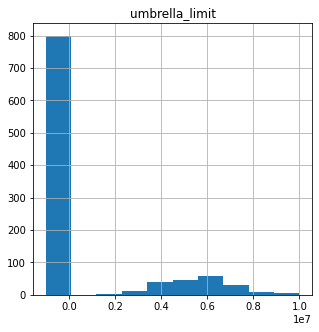

In [41]:
### Looks like most of the people have availed Umbrella limit

data.hist('umbrella_limit')

(<bound method IndexOpsMixin.value_counts of 0      0.20
 1      0.27
 2      0.29
 3      0.29
 4      0.29
        ... 
 995    0.23
 996    0.20
 997    0.16
 998    0.27
 999    0.09
 Name: insured_hobbies, Length: 1000, dtype: float64>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff221c553d0>]],
       dtype=object))

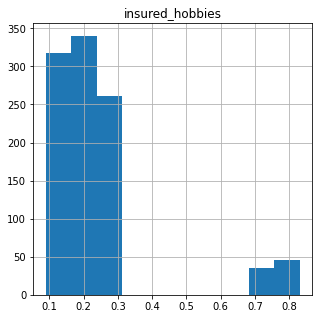

In [42]:
data['insured_hobbies'].value_counts,data.hist('insured_hobbies')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2217753d0>]],
      dtype=object)

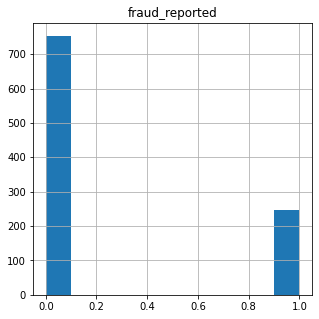

In [43]:
### The target column is not balanced that's why it didnt perform well in other models except in Balanced random classifier

data.hist('fraud_reported')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff221741190>]],
      dtype=object)

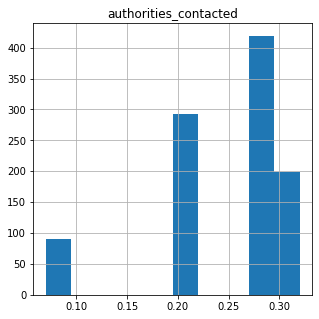

In [44]:
data.hist('authorities_contacted')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'\nfrom the graph it can be concluded that most of the fraud cases are done by the customers new \nto the company and that too comparatively younger ones. \n'

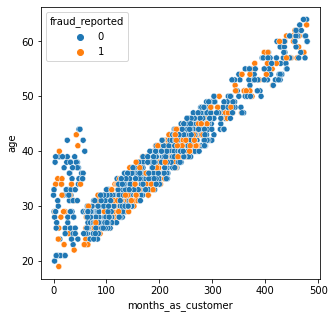

In [45]:
sns.scatterplot(data['months_as_customer'],data['age'], hue=data['fraud_reported'] )
"""
from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 
"""

In [46]:
param_RFC={'n_estimators':[100,200, 350, 500,1000], 'min_samples_leaf':[2, 10, 30]}
gr_reg =GridSearchCV(BalancedRandomForestClassifier(),param_grid=param_RFC,cv=5)
gr_reg.fit(x_train,y_train)
print("Best parameters for Random Forest:", gr_reg.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [47]:
# Hyper parameter tuning on Balanced Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 500, random_state = 0,min_samples_leaf = 2)


model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

Training Accuracy:  0.91875
Testing Accuarcy:  0.81
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       143
           1       0.63      0.81      0.71        57

    accuracy                           0.81       200
   macro avg       0.77      0.81      0.78       200
weighted avg       0.83      0.81      0.82       200

[[116  27]
 [ 11  46]]


In [48]:
from xgboost import XGBClassifier
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
#finding the best parameters
grid.fit(x_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


XGBClassifier(criterion='gini', max_depth=9, n_estimators=10)

In [49]:
y_pred = grid.best_estimator_.predict(x_test)
print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.91875
Testing Accuarcy:  0.81
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       143
           1       0.73      0.58      0.65        57

    accuracy                           0.82       200
   macro avg       0.79      0.75      0.76       200
weighted avg       0.81      0.82      0.81       200

[[131  12]
 [ 24  33]]


The Best Model so far is Balanced Random forrest classifier , it is providing the best result for the both the classes

In [56]:
#### Trying Prinicipal componenet analysis since we had some features which are correlated

pca_data = data.copy(deep=True)
pca_data = pca_data.drop('fraud_reported',axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(pca_data)
new_df = pd.DataFrame(df_scaled)



from sklearn.decomposition import PCA
pca = PCA()
df1 = pd.DataFrame(pca.fit_transform(new_df))
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.995377,1.339414,-1.055796,-0.144887,-1.249672,1.994864,-0.628849,-0.425304,0.378945,-1.090078,0.798539,-1.914355,-0.789831,0.479243,0.219697,-0.169748,-0.501692,1.109394,0.069580,0.460477,-0.241361,-0.158865,1.111135,-0.866524,0.571361,-0.047437,-0.115631,0.656237,0.869801,-0.264801,0.141449,-0.020845,-5.578766e-16
1,4.033510,1.095610,1.663394,0.546933,0.575985,-0.558316,0.007426,-0.100597,-2.087883,-0.285665,-0.997097,-0.289285,1.222519,1.818967,-0.222308,-0.056479,1.935592,0.193363,-0.688119,-0.482562,-0.541100,0.343111,0.189662,-0.461920,-0.420878,0.866666,-0.184326,-0.463608,0.081402,0.574045,-0.497636,0.086775,7.987463e-16
2,1.258635,-0.879681,-0.659968,-0.196020,1.658382,0.819624,0.297821,-0.633765,0.564521,0.902953,1.387621,-1.337111,0.217741,1.855113,-0.641253,0.760940,0.783369,1.610044,-0.393732,-0.062102,1.017271,0.824532,-0.981831,-0.017336,-0.916050,0.072060,0.814011,-0.250779,-0.893446,-0.325983,0.978365,-0.284919,1.022137e-15
3,-0.489647,0.714224,1.327470,-0.245542,2.810987,1.435644,0.740859,-0.915811,0.974507,1.430479,-0.541283,-1.357524,0.427608,1.872710,-0.818803,-0.605998,-0.968235,-0.820669,0.379826,2.966137,-1.226139,-1.204507,-0.338664,0.301686,1.700983,0.220489,-0.224433,0.752572,-0.108366,-0.938534,-0.024184,-0.177748,8.567092e-16
4,4.546435,1.223472,-0.273618,0.311510,0.997173,0.305757,-0.615449,0.183225,1.012774,1.585660,-1.693293,0.605425,1.874185,0.297800,0.585091,1.398069,-0.531955,-0.187025,-0.744917,1.743042,0.221281,0.570241,1.318550,-0.055234,0.784483,-2.343111,-0.235861,1.318971,-0.137988,0.094279,-0.162157,0.150005,2.833928e-15


In [58]:
y = data['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

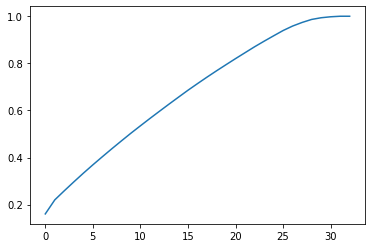

In [59]:
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


In [60]:
### After finding how many number of components to be used for training , pass the scaled data with n_components to PCA model

pca = PCA(n_components=30,random_state=10)
X = pca.fit_transform(new_df)
x_df = pd.DataFrame(X)
x_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.995377,1.339414,-1.055796,-0.144887,-1.249672,1.994864,-0.628849,-0.425304,0.378945,-1.090078,0.798539,-1.914355,-0.789831,0.479243,0.219697,-0.169748,-0.501692,1.109394,0.069580,0.460477,-0.241361,-0.158865,1.111135,-0.866524,0.571361,-0.047437,-0.115631,0.656237,0.869801,-0.264801
1,4.033510,1.095610,1.663394,0.546933,0.575985,-0.558316,0.007426,-0.100597,-2.087883,-0.285665,-0.997097,-0.289285,1.222519,1.818967,-0.222308,-0.056479,1.935592,0.193363,-0.688119,-0.482562,-0.541100,0.343111,0.189662,-0.461920,-0.420878,0.866666,-0.184326,-0.463608,0.081402,0.574045
2,1.258635,-0.879681,-0.659968,-0.196020,1.658382,0.819624,0.297821,-0.633765,0.564521,0.902953,1.387621,-1.337111,0.217741,1.855113,-0.641253,0.760940,0.783369,1.610044,-0.393732,-0.062102,1.017271,0.824532,-0.981831,-0.017336,-0.916050,0.072060,0.814011,-0.250779,-0.893446,-0.325983
3,-0.489647,0.714224,1.327470,-0.245542,2.810987,1.435644,0.740859,-0.915811,0.974507,1.430479,-0.541283,-1.357524,0.427608,1.872710,-0.818803,-0.605998,-0.968235,-0.820669,0.379826,2.966137,-1.226139,-1.204507,-0.338664,0.301686,1.700983,0.220489,-0.224433,0.752572,-0.108366,-0.938534
4,4.546435,1.223472,-0.273618,0.311510,0.997173,0.305757,-0.615449,0.183225,1.012774,1.585660,-1.693293,0.605425,1.874185,0.297800,0.585091,1.398069,-0.531955,-0.187025,-0.744917,1.743042,0.221281,0.570241,1.318550,-0.055234,0.784483,-2.343111,-0.235861,1.318971,-0.137988,0.094279


In [61]:
### pca1_train = x_train , pca2_train = y_train

from sklearn.model_selection import train_test_split
pca1_train, pca1_test,pca2_train,pca2_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(pca1_train.shape)
print(pca2_train.shape)

(800, 30)
(800,)


In [70]:
print(pca1_test.shape)
print(pca2_test.shape)

(200, 30)
(200,)


In [67]:
param_RFC={'n_estimators':[100,200, 350, 500,1000], 'min_samples_leaf':[2, 10, 30],'max_features':[5,7,9],'min_samples_split':[4,6,8]}
gr_reg =GridSearchCV(BalancedRandomForestClassifier(),param_grid=param_RFC,cv=5)
gr_reg.fit(pca1_train,pca2_train)
print("Best parameters for Random Forest:", gr_reg.best_params_)

Best parameters for Random Forest: {'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 1000}


In [71]:
y_pred = gr_reg.best_estimator_.predict(pca1_test)
print("Training Accuracy: ", model.score(pca1_train, pca2_train))
print('Testing Accuarcy: ', model.score(pca1_test, pca2_test))

# making a classification report
cr = classification_report(pca2_test,  y_pred)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(pca2_test, y_pred)
print(cm)

Training Accuracy:  0.9125
Testing Accuarcy:  0.665
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       151
           1       0.42      0.55      0.47        49

    accuracy                           0.70       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.73      0.70      0.71       200

[[113  38]
 [ 22  27]]


Looks Like the Best Model is LIGHTGBM for this dataset with the accuracy of 83% and we have not removed any outliers for this dataset since this is a fraud detection model , so each and every point is necessary for us.